In [ ]:
#Merging all YellowTaxi Files for 6 Months and taking random data

import glob
import pandas as pd
import numpy as np
import csv
from pandas import Series
from pandas import DataFrame
yellowFrame = pd.DataFrame()
yellowlist=[]
x=0
for files in glob.iglob("../../Data/YellowTaxi/*.csv"):
    rows=x+999999
    yellowdf = pd.read_csv(files,sep=',',nrows=rows)
    yellowlist.append(yellowdf)
    x=x+100000
yellowFrame = pd.concat(yellowlist)

In [142]:
#Forming YellowTaxi Data

yellowFrame.rename(columns = {'tpep_pickup_datetime':'pickup_datetime'},inplace=True)
yellowFrame.rename(columns = {'tpep_dropoff_datetime':'dropoff_datetime'},inplace=True)
yellowFrame['taxi_type']='YellowTaxi'
yellowData=DataFrame(yellowFrame,columns=['pickup_datetime','dropoff_datetime','fare_amount','extra','tip_amount',
                                          'tolls_amount','mta_tax','improvement_surcharge','total_amount','taxi_type'])


In [ ]:
#Merging all GreenTaxi Files for 6 Months

import glob
import pandas as pd
import numpy as np
import csv
from pandas import Series
from pandas import DataFrame
greenFrame = pd.DataFrame()
greenlist=[]
for files in glob.iglob("../../Data/RawGreen/*.csv"):
    greendf = pd.read_csv(files,sep=',')
    greenlist.append(greendf)
greenFrame = pd.concat(greenlist)

In [143]:
#Forming GreenTaxi Data

greenFrame.rename(columns = {'lpep_pickup_datetime':'pickup_datetime'},inplace=True)
greenFrame.rename(columns = {'Lpep_dropoff_datetime':'dropoff_datetime'},inplace=True)
greenFrame['taxi_type']='GreenTaxi'
greenData=DataFrame(greenFrame,columns=['pickup_datetime','dropoff_datetime','Fare_amount','Extra','Tip_amount',
                                          'Tolls_amount','MTA_tax','improvement_surcharge','Total_amount','taxi_type'])
greenData.columns = map(str.lower, greenData.columns)

In [ ]:
#Taking Uber Data

import os
uberFile="../../Data/Uber/Uber-Raw-Data-Jan-June-2016.csv"
uberFrame=pd.read_csv(uberFile,sep=",")

In [154]:
#Merge Uber,GreenTaxi and YellowTaxi

import calendar
uberFrame['taxi_type']='Uber'
uberFrame.rename(columns = {'pickup_date':'pickup_datetime'},inplace=True)
uberFrame.head()
uberPickup=DataFrame(uberFrame,columns=['pickup_datetime','taxi_type'])
greenPickup=DataFrame(greenFrame,columns=['pickup_datetime','taxi_type'])
yellowPickup=DataFrame(yellowFrame,columns=['pickup_datetime','taxi_type'])
PickupMerge=[uberPickup,greenPickup,yellowPickup]
result=pd.concat(PickupMerge)
result['Month']=pd.to_datetime(result['pickup_datetime']).dt.month
rideCount=DataFrame(result.groupby(['taxi_type','Month'])['Month'].agg({'count'}).reset_index())
rideCount.to_csv("output/ride_count.csv")
pivot=DataFrame(rideCount.pivot(index='Month', columns='taxi_type', values='count'))
pivot.to_csv("output/pivot.csv")
pivot_df=pd.read_csv("output/pivot.csv")
pivot_df["MonthName"]=pivot_df['Month'].apply(lambda x:calendar.month_abbr[x])

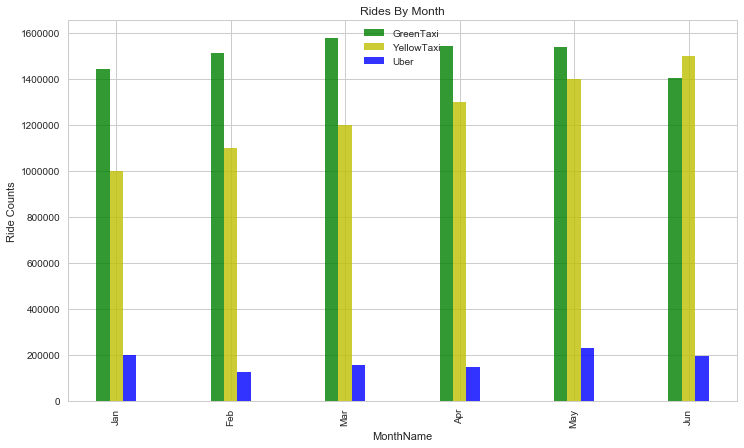

In [257]:
#Plot to Show No of Rides for the period Jan 2016-June 2016 for GreenTaxi,YellowTaxi,Uber

bar_width = 0.35
opacity = 0.8
colors = ['g','y','b']
cols = ['GreenTaxi','YellowTaxi','Uber']
title = 'Rides By Month'
ylabel = "Ride Counts"

ax = pivot_df.set_index('MonthName')[cols].plot.bar(width=bar_width,
                                                    alpha=opacity, 
                                                    figsize=(12,7), 
                                                    color=colors, 
                                                    title=title)
ax.set_ylabel(ylabel)
ax.legend(loc='upper center',prop={'size':10})

In [260]:
#Merge the data to gather information about Amount collected by Green Taxi,Yellow Taxi Monthwise
#Uber Data is not merged as we do not have data for it

rideAmount=[greenData,yellowData]
amountMerge=pd.concat(rideAmount)
amountMerge['taxi_type'].unique()
amountMerge=amountMerge.drop("dropoff_datetime",axis=1)
amountMerge['Month']=pd.to_datetime(amountMerge['pickup_datetime']).dt.month
amountMerge=amountMerge.drop("pickup_datetime",axis=1)
splitup=amountMerge.groupby(['Month','taxi_type'])['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount'].sum().reset_index()
melted = pd.melt(splitup, id_vars=["Month","taxi_type"], 
                 var_name=["Category"], value_name="Score")
melted["MonthName"]=melted['Month'].apply(lambda x:calendar.month_abbr[x])
melted.to_csv("output/melted.csv")

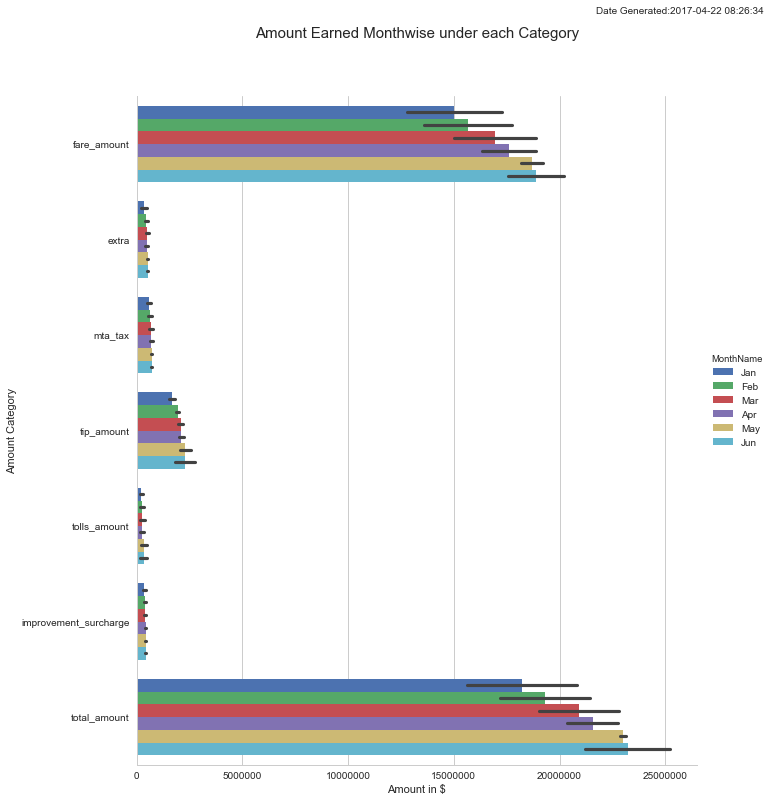

In [272]:
#Plot to show Amount Earned under different category every month by all three companies

import pandas as pd
import seaborn as sns
saturated=pd.read_csv("output/melted.csv")
sns.factorplot(x="Score",y="Category",hue="MonthName",data=saturated,saturation=2,size=10,aspect=1,kind="bar",legend=True)

plt.title('Amount Earned Monthwise under each Category',fontsize=15,y=1.08)
plt.xlabel('Amount in $')
plt.ylabel('Amount Category')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.draw()
plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')

fig1 = plt.gcf()
plt.show()
fig1.savefig("graph/analysis1_amount_monthwise.png")

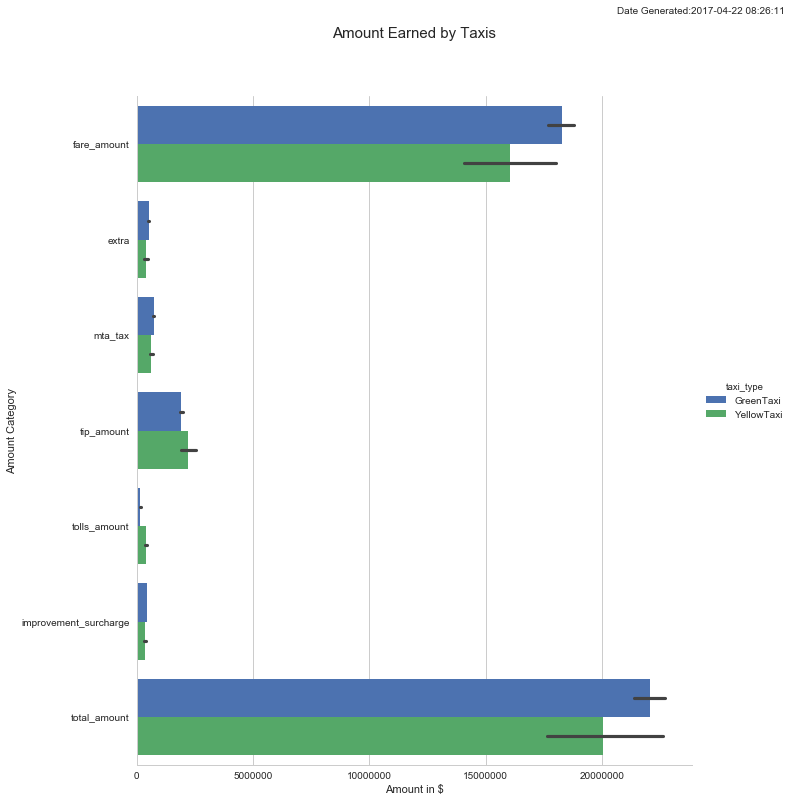

In [271]:
#Plot to show Amount Earned by Different Taxi Companies

import pandas as pd
import seaborn as sns
saturated=pd.read_csv("output/melted.csv")
sns.factorplot(x="Score",y="Category",hue="taxi_type",data=saturated,saturation=2,size=10,aspect=1,kind="bar",legend=True)

plt.title('Amount Earned by Taxis',fontsize=15,y=1.08)
plt.xlabel('Amount in $')
plt.ylabel('Amount Category')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.draw()
plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')

fig1 = plt.gcf()
plt.show()
fig1.savefig("graph/analysis1_taxi_earning_category.png")

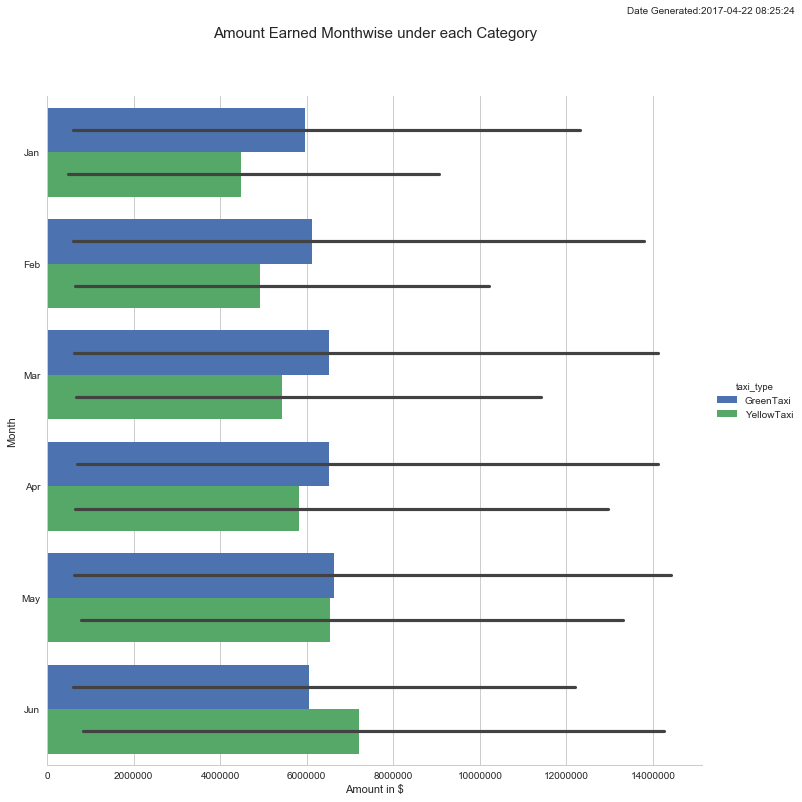

In [270]:
#Plot to show Amount Earned by Taxi Companies Every Month

import pandas as pd
import seaborn as sns
saturated=pd.read_csv("output/melted.csv")
sns.factorplot(x="Score",y="MonthName",hue="taxi_type",data=saturated,saturation=2,size=10,aspect=1,kind="bar",legend=True)

plt.title('Amount Earned Monthwise under each Category',fontsize=15,y=1.08)
plt.xlabel('Amount in $')
plt.ylabel('Month')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.draw()
plt.figtext(1.0, 1.10, 'Date Generated:'+str(datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')), horizontalalignment='right')

fig1 = plt.gcf()
plt.show()
fig1.savefig("graph/analysis1_amount_monthwise_taxi.png")